In [1]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

## Bar Plot(막대그래프, bar chart, bar graph)

범주(category)에 따른 수치 값을 비교하기에 적합한 방법
* 개별 비교, 그룹 비교 모두 적합

* 막대의 방향에 따른 분류(`.bar()` , `.barh()`)
    * 수직(vertical) : x축에 범주, y축에 값을 표기(기본값)
    * 수평(horizontal) : y축에 범주, x축에 값을 표기(범주가 많을때 적합)

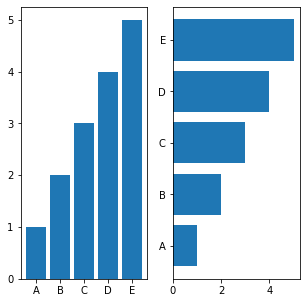

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(5,5))

x = list('ABCDE')
y = np.array([1, 2, 3, 4, 5])

axes[0].bar(x,y)
axes[1].barh(x,y) # 가로 bar

plt.show()

In [5]:
student = pd.read_csv('./StudentsPerformance.csv')
# head 보다 sample를 사용해 랜덤으로 추출해서 분포를 파악하는걸 추천
student.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
271,male,group C,some college,standard,none,58,49,42
34,male,group E,some college,standard,none,97,87,82
430,male,group C,associate's degree,free/reduced,none,64,66,59
869,male,group C,associate's degree,free/reduced,none,49,51,51
175,female,group C,master's degree,standard,completed,81,91,87


In [ ]:
# 데이터의 타입, Null 값 확인
student.info()

In [11]:
# include='all' 옵션으로 범주형의 unique 정보도 알아보자
student.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [ ]:
# 성별에 따른 race/ehincity 분포
group = student.groupby('gender')['race/ethnicity'].value_counts().sort_index()
display(group)
print(student['gender'].value_counts())

### 1.Multiple Bar Plot
Bar plot에서는 1개의 feature에 대해서만 보여준다. 여러 그룹을 보여주기 위해서는

* 플롯을 여러개 그리는 방법
* (그룹이 5~7개 이하일때)한개의 플롯을 동시에 나타내는 방법 : 쌓아서, 겹처서, 이웃에 배치하여

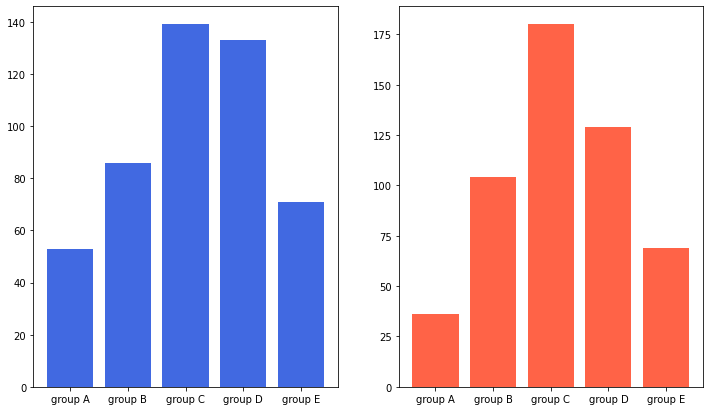

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12,7))
axes[0].bar(group['male'].index, group['male'], color='royalblue')
axes[1].bar(group['female'].index, group['female'], color='tomato')
plt.show()

이 경우 각각 그래프의 y축 스케일이 다르다. 통일하기 위한 방법으로는

* `sharey=True` : 같은 axes안에 스케일을 동일하게 만들기 위한 옵션

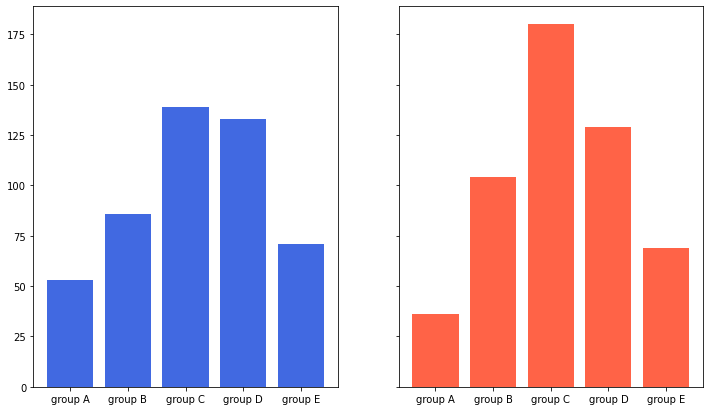

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12,7), sharey=True)
axes[0].bar(group['male'].index, group['male'], color='royalblue')
axes[1].bar(group['female'].index, group['female'], color='tomato')
plt.show()

* 반복문을 활용하여 y축 개별적으로 조정하기

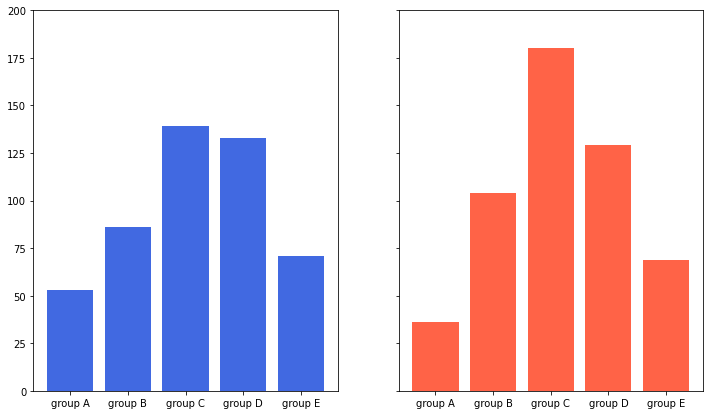

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(12,7), sharey=True)
axes[0].bar(group['male'].index, group['male'], color='royalblue')
axes[1].bar(group['female'].index, group['female'], color='tomato')

for ax in axes:
    ax.set_ylim(0,200)
plt.show()

이 경우 그룹간의 비율을 비교하기가 어렵다.

#### 1.1.Stacked Bar plot(쌓아서)
2개 이상의 그룹을 쌓아서 표현하는 bar plot, 다만 이 경우는 위에 쌓여지는 그룹(여기선 여성)의 분포는 파악하기 어렵다.
* 각 bar에서 나타나는 그룹의 순서는 항상 유지
* `.bar()` bottom : bottom을 사용해서 아래 공간을 비워둘 수 있다.
* `.barh()` left

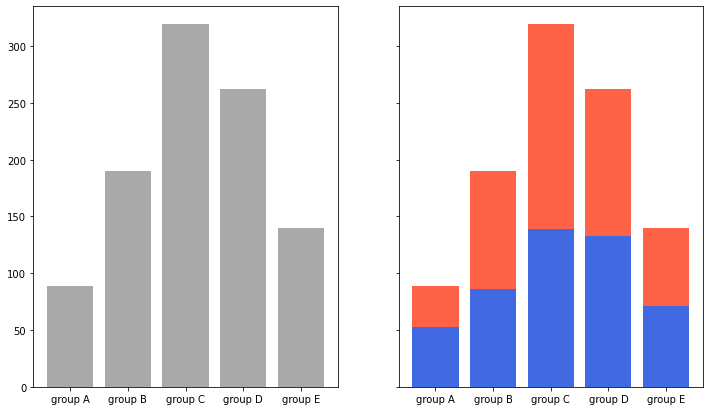

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12,7), sharey=True)
group_cnt =student['race/ethnicity'].value_counts().sort_index()
# 원본
axes[0].bar(group_cnt.index, group_cnt, color='darkgray')
# Stacked, bottom을 사용해서 집어넣어준다.
axes[1].bar(group['male'].index, group['male'], color='royalblue')
axes[1].bar(group['female'].index, group['female'], bottom=group['male'], color='tomato')
plt.show()

* 응용하여 전체의 비율을 나타내는 Percentage Stacked Bar Chart 

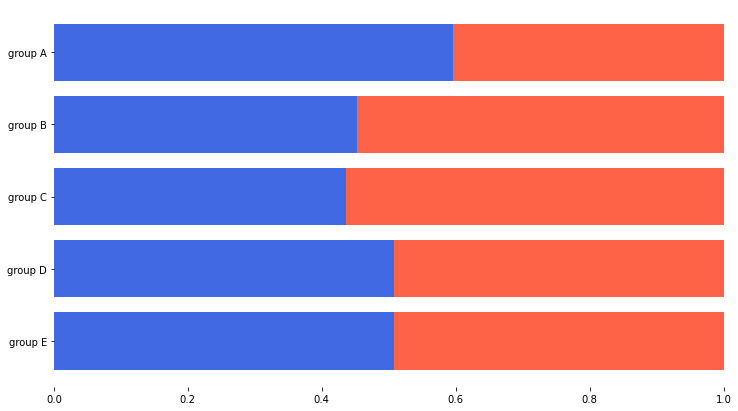

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(12,7))
group_sort = group.sort_index(ascending=False) # 순서를 바꾸기 위해 역순 정렬
total = group_sort['male'] + group_sort['female']

ax.barh(group_sort['male'].index, group_sort['male']/total,
       color='royalblue')
ax.barh(group_sort['female'].index, group_sort['female']/total,
       left=group_sort['male']/total,
       color='tomato')

ax.set_xlim(0,1)

#태두리 제거
for s in ['top', 'bottom','left','right']:
    ax.spines[s].set_visible(False)
    
    
plt.show()

#### 1.2.Overlapped Bar plot(겹쳐서)
2개 그룹만 비교시 주로 사용(3개 이상은 파악이 어려움)
* `alpha()` : 투명도 조정
* Bar 보다는 Area plot에서 더 효과적

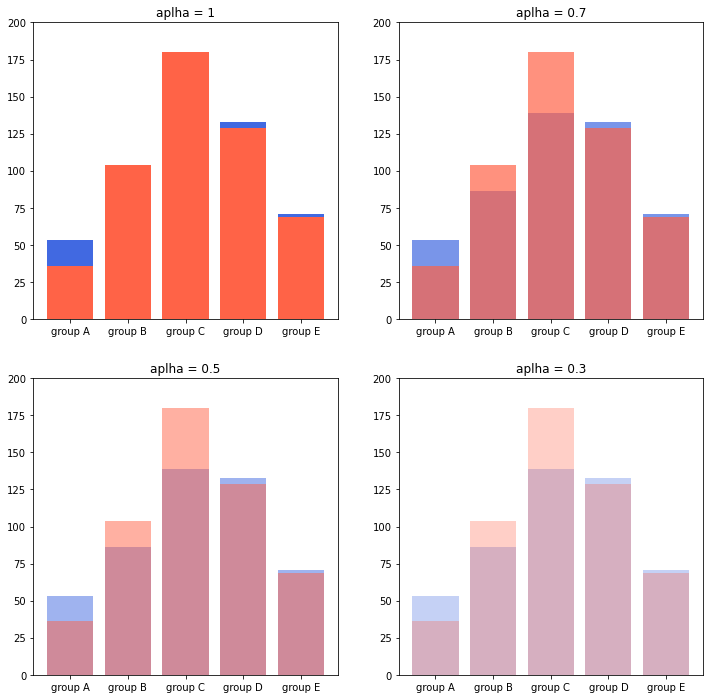

In [12]:
group_sort = group.sort_index()

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()

for idx, alpha in enumerate([1, 0.7, 0.5, 0.3]):
    axes[idx].bar(group['male'].index, group['male'],
                 color='royalblue',
                 alpha=alpha)
    axes[idx].bar(group['female'].index, group['female'],
                 color='tomato',
                 alpha=alpha)
    axes[idx].set_title(f'aplha = {alpha}')
    
for ax in axes:
    ax.set_ylim(0, 200)
    
plt.show()

#### 1.3.Grouped Bar Plot(이웃에 배치)
그룹별 범주에 따른 bar를 이웃되게 배치하는 방법

* x축 조정
* width(두께)
* xticks, xticklabels

x축이 0,1,2,3으로 시작한다고 보면 x축을 반씩 쪼개서 사용한다.
- 한 그래프는 0-width/2, 1-width/2 ..
- 다른 그래프는 0+width/2, 1+width/2 ..

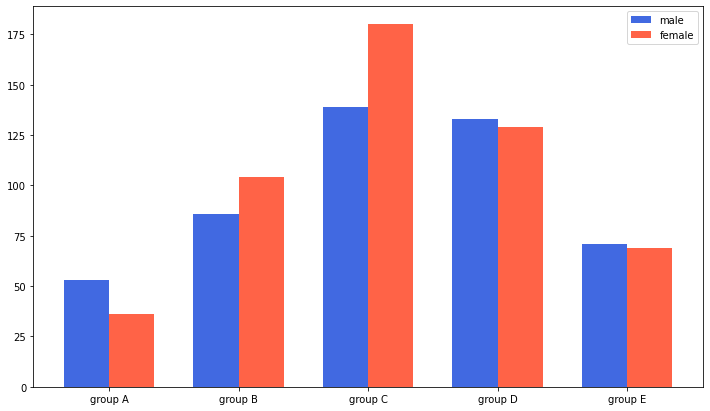

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

idx = np.arange(len(group['male'].index))
width = 0.35

ax.bar(idx-width/2, group['male'],
      color='royalblue',
      width=width, label='male')
ax.bar(idx+width/2, group['female'],
      color='tomato',
      width=width, label='female')

ax.set_xticks(idx)
ax.set_xticklabels(group['male'].index)
ax.legend()

plt.show()

#### 그룹이 N개 일때는?

- 2개 : -1/2, +1/2
- 3개 : -1, 0, +1 (-2/2, 0, +2/2)
- 4개 : -3/2, -1/2, +1/2, +3/2

$x+\frac{-N+1+2\times i}{2}\times width$

In [23]:
# 인종에 따른 학력
group = student.groupby('parental level of education')['race/ethnicity'].value_counts().sort_index()
group_list = sorted(student['race/ethnicity'].unique())
edu_lv = student['parental level of education'].unique()

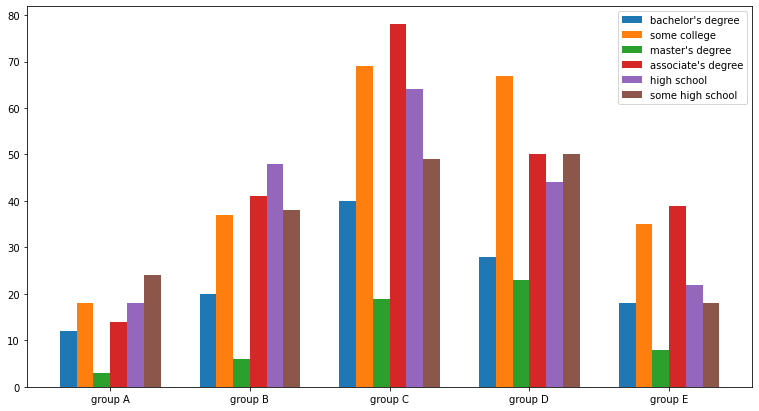

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(13, 7))

x = np.arange(len(group_list))
# 여기서 width은 1(꽉참)을 기준으로 적절히 넣어주자.
width=0.12

for idx, g in enumerate(edu_lv):
    ax.bar(x+(-len(edu_lv)+1+2*idx)*width/2, group[g], 
       width=width, label=g)

ax.set_xticks(x)
ax.set_xticklabels(group_list)
ax.legend()    
    
plt.show()

그룹이 많은 경우, 적은 그룹은 ETC로 한번에 묶어서 처리하자.

### 2. 정확한 Bar Plot

#### 2.1. Principle of Proportion Ink
실제 값과 그에 표현되는 그래픽으로 표현되는 잉크 양은 비례해야 한다. 즉
* 반드시 x축의 시작은 **zero(0)**
    * 만약 차이를 나타내고 싶다면 plot의 세로 비율을 늘린다.

In [35]:
score = student.groupby('gender').mean().T
score

gender,female,male
math score,63.633205,68.728216
reading score,72.608108,65.473029
writing score,72.467181,63.311203


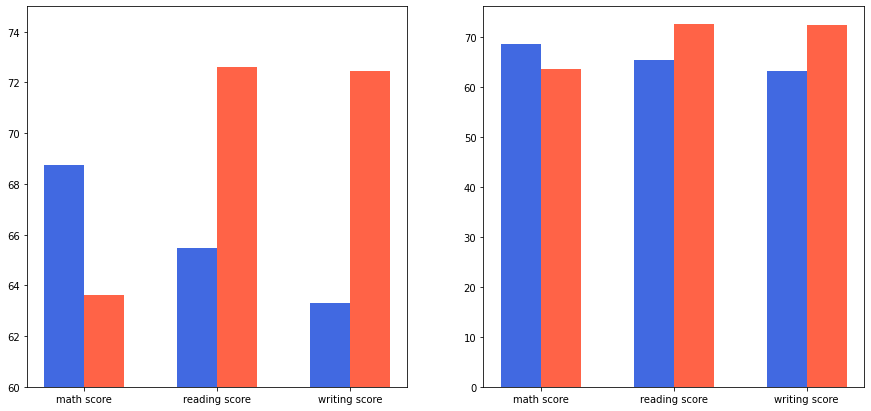

In [38]:
fig, axes = plt.subplots(1, 2 , figsize=(15, 7))
idx = np.arange(len(score.index))
width = 0.3

for ax in axes:
    ax.bar(idx-width/2 , score['male'],
          color='royalblue',
          width=width)
    ax.bar(idx+width/2, score['female'],
          color='tomato',
          width=width)
    ax.set_xticks(idx)
    ax.set_xticklabels(score.index)

# 스케일을 바꿔서 보여주면 같은 그래프여도 다르게 보인다.
axes[0].set_ylim(60,75)

plt.show()

#### 2.2. 데이터 정렬하기
더 정확한 정보를 전달하기 위해서는 데이터를 정렬 후 시각화 하자.
* pandas : sort_values(), sort_index()
* 데이터 종류에 따라 기준이 달라진다. 
    * 시계열 : 시간순
    * 수치형 : 크기순
    * 순서형 : 범주의 순서대로
    * 명목형 : 범주의 값 따라 정렬
    
여러가지 기준으로 정렬하여 insight 발견을 해보자.

#### 2.3. 적절한 공간 활용
여백과 공간만 조정해도 가독성이 높아짐

* X/Y axis Limit(`.set_xlim()`, `.set_ylim()`)
* Margins(`.margins()`) : 사각형안에 비율 설정
* Gap(`width`)
* Spines(`.spines[spine].set_visible()`) : 태두리 유무

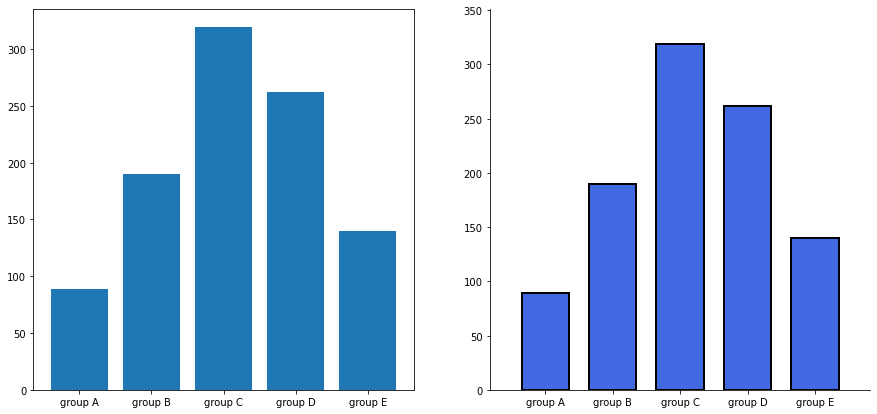

In [52]:
group_cnt = student['race/ethnicity'].value_counts().sort_index()

fig = plt.figure(figsize=(15, 7))

ax_basic = fig.add_subplot(1, 2, 1)
ax = fig.add_subplot(1, 2, 2)

ax_basic.bar(group_cnt.index, group_cnt)
ax.bar(group_cnt.index, group_cnt,
      width=0.7,
      edgecolor='black', # 태두리
      linewidth=2, # 태두리 두께
      color='royalblue')

ax.margins(0.1, 0.1) # 비율 설정

for s in ['top', 'right']: # 태두리 제거
    ax.spines[s].set_visible(False)

plt.show()

#### 2.4. 복잡함과 단순함
무엇을 보고 싶은지, 필요한 것을 보여주자.

* grid : 격자 추가
* text

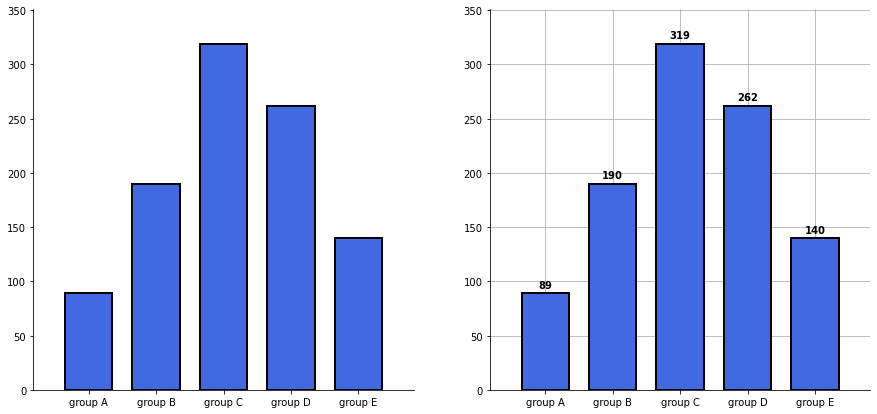

In [60]:
group_cnt = student['race/ethnicity'].value_counts().sort_index()

fig, axes= plt.subplots(1, 2, figsize=(15, 7))

for ax in axes:
    ax.bar(group_cnt.index, group_cnt,
      width=0.7,
      edgecolor='black', # 태두리
      linewidth=2, # 태두리 두께
      color='royalblue',
          zorder=10) # 격자를 위한 추가
    
    ax.margins(0.1, 0.1)
    
    for s in ['top','right']:
        ax.spines[s].set_visible(False)
        
axes[1].grid(zorder=0)

# text 추가
for idx,value in zip(group_cnt.index, group_cnt):
    axes[1].text(idx, value+5, s=value,
                ha='center',
                fontweight='bold')
plt.show()

#### 2.5. ETC

* errorbar : 오차 막대를 추가해서 Uncertainty 정보를 추가 가능
* bar 사이의 Gap이 0 : 히스토그램

In [61]:
score_var = student.groupby('gender').std().T
score_var

gender,female,male
math score,15.491453,14.356277
reading score,14.378245,13.931832
writing score,14.844842,14.113832


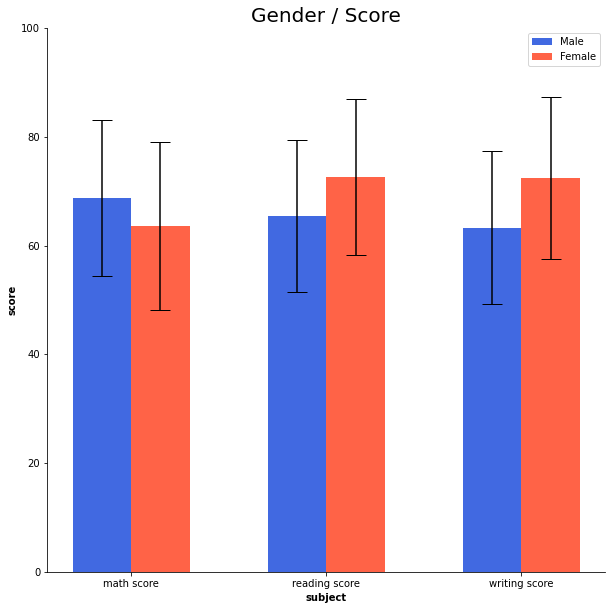

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

idx =np.arange(len(score_var.index))
width = 0.3

ax.bar(idx-width/2, score['male'],
      color='royalblue',
      width=width,
      label='Male',
       #error bar 추가
        yerr=score_var['male'],
        capsize=10
      )

ax.bar(idx+width/2, score['female'],
      color='tomato',
      width=width,
      label='Female',
       yerr=score_var['female'],
       capsize=10
      )

ax.set_xticks(idx)
ax.set_xticklabels(score.index)
ax.set_ylim(0,100)

for s in ['top','right']:
    ax.spines[s].set_visible(False)

ax.legend()
ax.set_title('Gender / Score', fontsize=20)
ax.set_xlabel('subject', fontweight='bold')
ax.set_ylabel('score', fontweight='bold')

plt.show()